In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# (a)

## 1st circuit

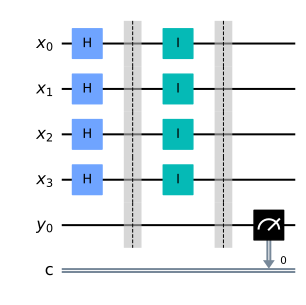

In [2]:
n = 4

x = QuantumRegister(n, name="x")
y = QuantumRegister(1, name="y")
c = ClassicalRegister(1, name="c")
qc = QuantumCircuit(x, y, c)

qc.h(x)

qc.barrier()
qc.i(x)
qc.barrier()
qc.measure(y[0], c[0])

qc.draw()

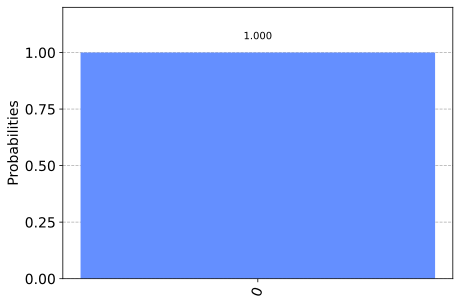

In [3]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### In the first circuit, $f$ is constant.

## 2nd circuit

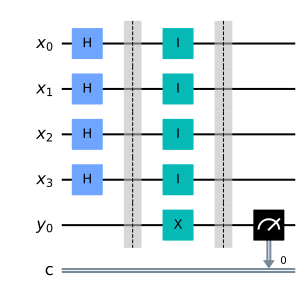

In [4]:
x = QuantumRegister(n, name="x")
y = QuantumRegister(1, name="y")
c = ClassicalRegister(1, name="c")
qc = QuantumCircuit(x, y, c)

qc.h(x)

qc.barrier()
qc.i(x)
qc.x(y)
qc.barrier()
qc.measure(y[0], c[0])

qc.draw()

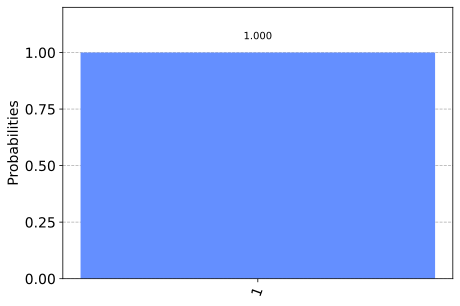

In [5]:
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### In the second circuit, $f$ is constant.

## 3rd circuit

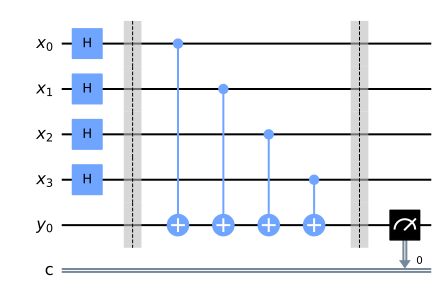

In [6]:
x = QuantumRegister(n, name="x")
y = QuantumRegister(1, name="y")
c = ClassicalRegister(1, name="c")
qc = QuantumCircuit(x, y, c)

qc.h(x)

qc.barrier()
qc.cx(x, y)
qc.barrier()
qc.measure(y[0], c[0])

qc.draw()

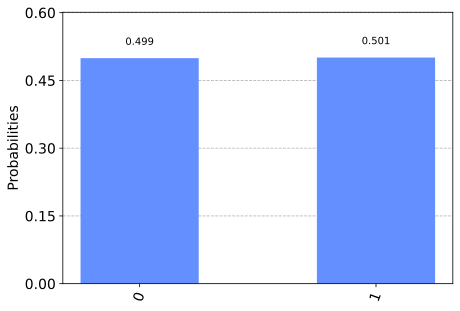

In [7]:
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### In the third circuit, $f$ is balanced.

# (b)

## 1st circuit

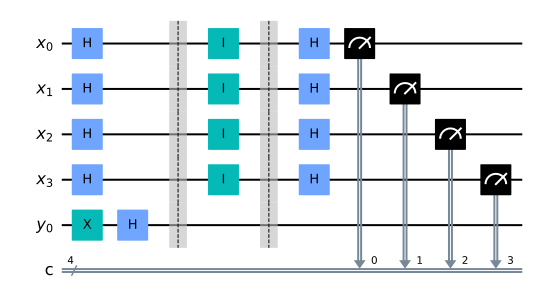

In [8]:
x = QuantumRegister(n, name="x")
y = QuantumRegister(1, name="y")
c = ClassicalRegister(n, name="c")
qc = QuantumCircuit(x, y, c)

qc.x(y)
qc.h(x)
qc.h(y)

qc.barrier()
qc.i(x)
qc.barrier()

qc.h(x)
qc.measure(x, c)

qc.draw()

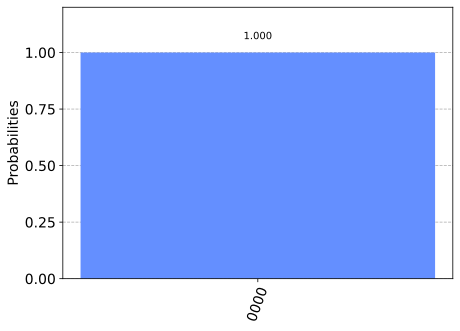

In [9]:
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### The first oracle is constant.

## 2nd circuit

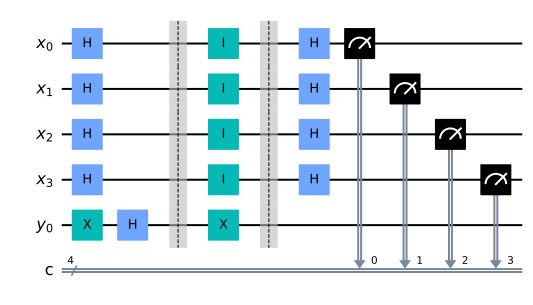

In [10]:
x = QuantumRegister(n, name="x")
y = QuantumRegister(1, name="y")
c = ClassicalRegister(n, name="c")
qc = QuantumCircuit(x, y, c)

qc.x(y)
qc.h(x)
qc.h(y)

qc.barrier()
qc.i(x)
qc.x(y)
qc.barrier()

qc.h(x)
qc.measure(x, c)

qc.draw()

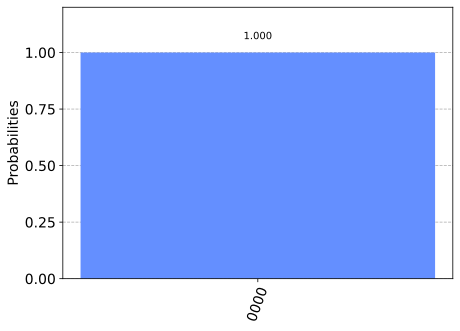

In [11]:
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### The second oracle is constant.

## 3rd circuit

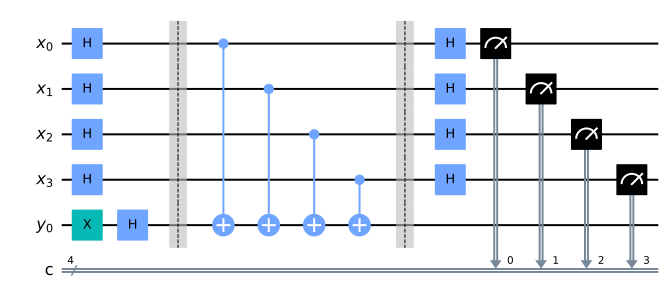

In [12]:
x = QuantumRegister(n, name="x")
y = QuantumRegister(1, name="y")
c = ClassicalRegister(n, name="c")
qc = QuantumCircuit(x, y, c)

qc.x(y)
qc.h(x)
qc.h(y)

qc.barrier()
qc.cx(x, y)
qc.barrier()

qc.h(x)
qc.measure(x, c)

qc.draw()

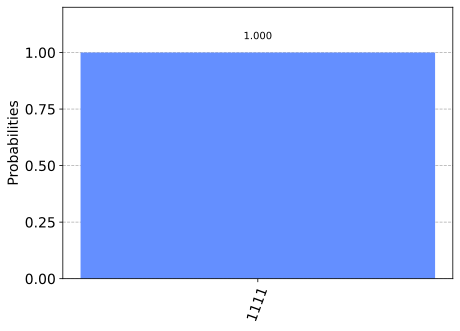

In [13]:
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### The third oracle is balanced.

# remark
### Design an oracle with function $
f(x) = 
\begin{cases}
0, x = 000, 010, 100, 110 \\
1, \text{otherwise}
\end{cases}
$

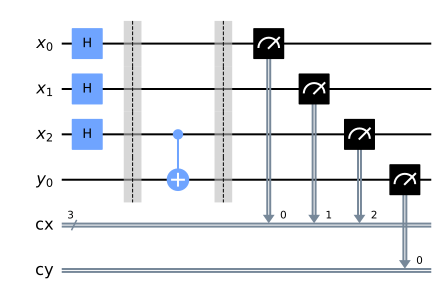

In [14]:
x = QuantumRegister(3, name="x")
y = QuantumRegister(1, name="y")
cx = ClassicalRegister(3, name="cx")
cy = ClassicalRegister(1, name="cy")
qc = QuantumCircuit(x, y, cx, cy)

qc.h(x)

qc.barrier()
qc.cx(x[2], y)
qc.barrier()
qc.measure(x, cx)
qc.measure(y, cy)

qc.draw()

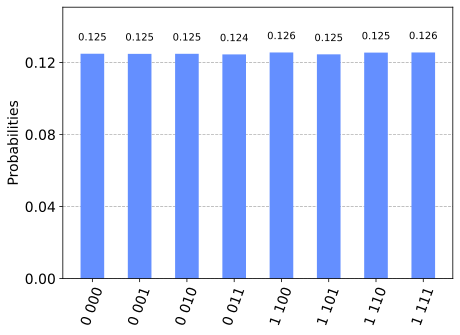

In [15]:
job = execute(qc, simulator, shots=1000000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)